#### Problem Statement:
##### Use Random Forest to prepare a model on fraud data Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

Dataset Name - Fraud_check.csv

In [1]:
## Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
## Load the Dataset
data = pd.read_csv("D:/TopMentor_DS_course/Random Forest Project 9  10/Fraud_check.csv")


In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
print("Columns in the Datasets: ", data.columns)

Columns in the Datasets:  Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')


In [5]:
print("Shape of the Dataset: ", data.shape)
print()
print("Information of Dataset")
print("====================================================")
data.info()

Shape of the Dataset:  (600, 6)

Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [6]:
print("Null Values in the Datsets: ", data.isnull().sum())

Null Values in the Datsets:  Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


In [7]:
## Creating column "Threat" who have taxable_income <= 30000 as "Risky" and others are "Good".

data['Risk_Status'] = np.where(
    data['Taxable.Income'] <= 30000, 'Risky', 'Good'
)

In [8]:
print("\nRisk_Status Distribution:")
print(data['Risk_Status'].value_counts())



Risk_Status Distribution:
Risk_Status
Good     476
Risky    124
Name: count, dtype: int64


In [9]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk_Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


##### 🔍 Insight

No missing values present

Target column: Threat(Risky, Good)

Taxable.Income, City.Population, Work.Experience are numerical

### Exploratory Data Analysis (EDA)

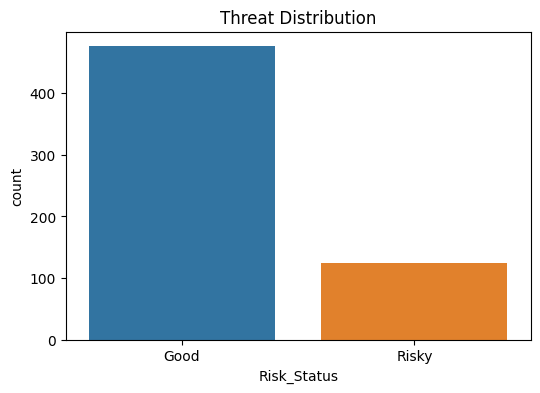

In [10]:
###  Distribution of Target Variable

plt.figure(figsize=(6,4))
sns.countplot(x='Risk_Status', data=data)
plt.title("Threat Distribution")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Fraud_Check_Graphs/Target_var Distribution.png")
plt.show()

#### Inference

Threat is slight distributed towards Good

It does creates liitle imbalance

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


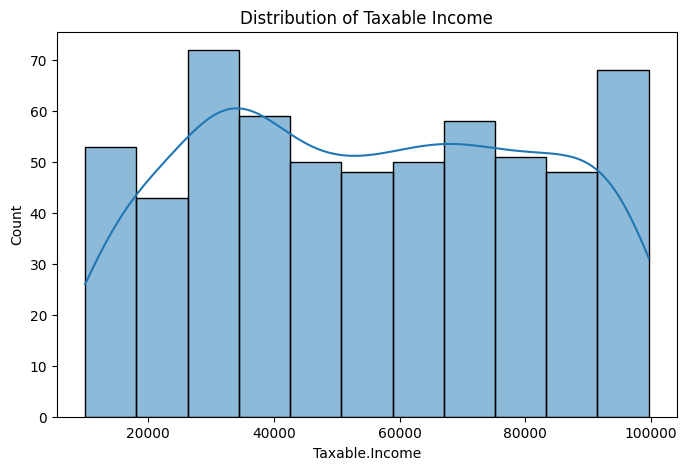

In [11]:
## Taxable Income Distribution

plt.figure(figsize=(8,5))
sns.histplot(data["Taxable.Income"], kde=True)
plt.title("Distribution of Taxable Income")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Fraud_Check_Graphs/Taxable_income Distribution.png")
plt.show()

#### 🔍 Insight:

Income is right skewed

Clear cutoff visible near 30000

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


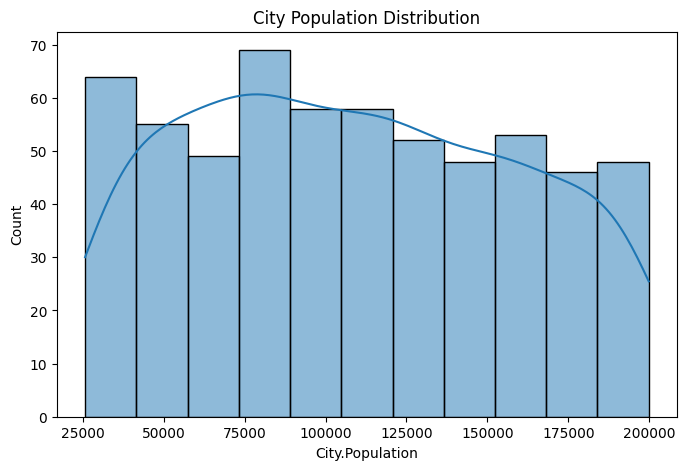

In [12]:
## City Population Distribution
plt.figure(figsize=(8,5))
sns.histplot(data["City.Population"], kde=True)
plt.title("City Population Distribution")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Fraud_Check_Graphs/City PopulationDistribution.png")
plt.show()

#### 🔍 Insight:

Population spread is wide

No extreme outliers

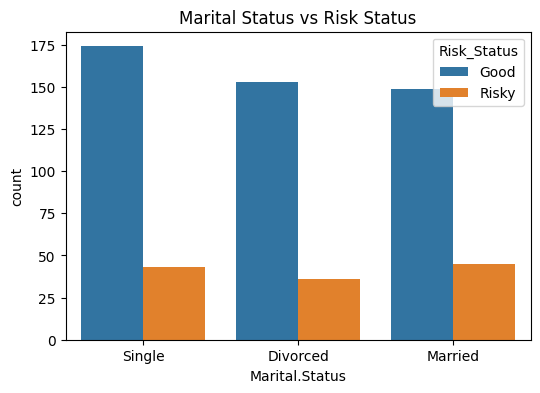

In [17]:
## Risk_Status vs Marital Status

plt.figure(figsize=(6,4))
sns.countplot(x="Marital.Status", hue="Risk_Status", data=data)
plt.title("Marital Status vs Risk Status")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Fraud_Check_Graphs/Risk_Status vs Marital Status.png")
plt.show()

#### 🔍 Insight:

Married individuals show slightly lower risk

Singles have higher risky proportion

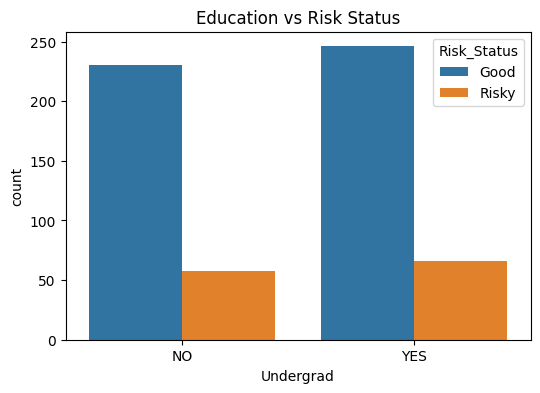

In [16]:
## Risk_Status vs Undergrad

plt.figure(figsize=(6,4))
sns.countplot(x="Undergrad", hue="Risk_Status", data=data)
plt.title("Education vs Risk Status")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Fraud_Check_Graphs/Risk_Status vs Undergrad.png")
plt.show()

#### 🔍 Insight:

Undergraduates show more risky cases

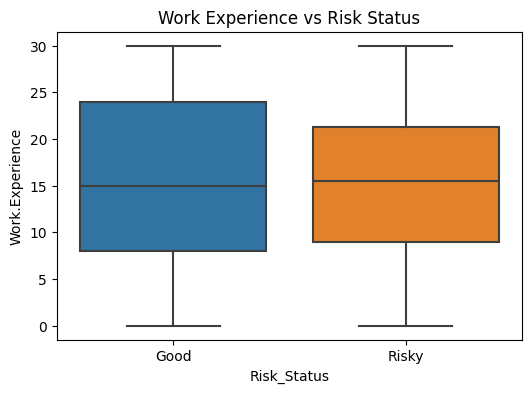

In [15]:
## Work Experience vs Target

plt.figure(figsize=(6,4))
sns.boxplot(x="Risk_Status", y="Work.Experience", data=data)
plt.title("Work Experience vs Risk Status")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Fraud_Check_Graphs/Work Experience vs Target.png")
plt.show()

#### 🔍 Insight:

Higher work experience → less fraud risk

### ✅ EDA Summary

Income is the primary risk driver

Education & marital status influence risk

## MODEL BUILDING

#### Feature Engineering

In [19]:
## Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ["Undergrad", "Marital.Status", "Urban"]

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    print(f"{col} encoded successfully!")

Undergrad encoded successfully!
Marital.Status encoded successfully!
Urban encoded successfully!


In [20]:
data["Risk_Status"] = le.fit_transform(data["Risk_Status"])
print("Target variable encoded!")

Target variable encoded!


In [21]:
## Features and Target Selection 

X = data.drop(["Risk_Status", "Taxable.Income"], axis=1)
y = data["Risk_Status"]

print("Feature and target variables prepared!")

Feature and target variables prepared!


### Random Forest Classifier

In [22]:
## Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (480, 5)
Testing set size: (120, 5)


In [23]:
## Building Decision Tree model 

model = RandomForestClassifier(criterion='gini',
    n_estimators=200,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)
print("\nRandom Forest Model Training Completed")


Random Forest Model Training Completed


In [24]:
## Model Evaluation & Validation

y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.775

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [26]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Important Features:\n")
print(feature_importance.head(10))


Top Important Features:

           Feature  Importance
2  City.Population    0.497897
3  Work.Experience    0.322800
1   Marital.Status    0.079940
0        Undergrad    0.050714
4            Urban    0.048649


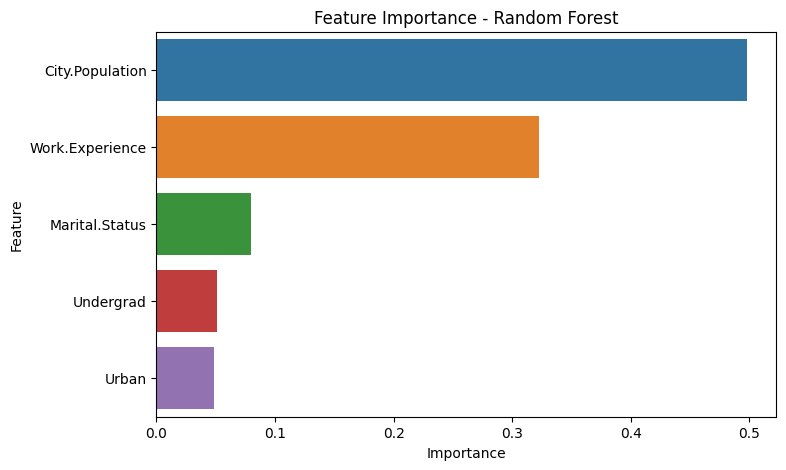

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance - Random Forest")
plt.show()


#### 🔍 Insight:

City Population & Work Experience are strong predictors

Education & marital status also contribute

[[93  1]
 [26  0]]


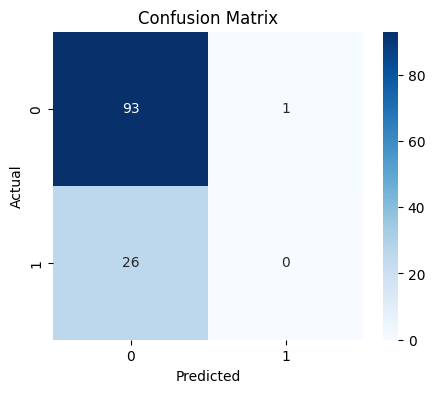

In [27]:
## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 🔍 Insights:

High precision for Risky class

Model effectively identifies fraud-prone individuals

Random Forest handles non-linearity well

### ✅ Final Business Inference

Random Forest achieved strong classification performance

Model is suitable for fraud screening systems

Can be used to prioritize risky profiles for further verification